In [13]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
from pandas_datareader import data as pdr
import pandas_datareader as web
import matplotlib.pyplot as plt
from sqlalchemy import create_engine


# Extract and Transform the Largest Public Company by Sector



In [21]:
# Use Panda's `read_html` to parse the url from Wikipedia
url_largest_company = "https://en.wikipedia.org/wiki/Forbes_Global_2000"
table_largest_company = pd.read_html(url_largest_company, index_col = 0)
largest_company_df = table_largest_company[3]

# Create a new function to find null values:
def num_missing(x):
  return sum(x.isnull())

# Applying per column:
print ("Missing values per column:")
print (largest_company_df.apply(num_missing, axis=0))

# Applying per row:
print ("Missing values per row:")
print (largest_company_df.apply(num_missing, axis=1))

# Drop columns based on percentage of null values in each individual row
thresh = len(largest_company_df) * .80
largest_company_df.dropna(thresh = thresh, axis = 1, inplace = True)
largest_company_df.head()

# Check dtypes of values in columns
largest_company_df.dtypes

# Check to see whether there are any null values remaining:
def num_missing(x):
  return sum(x.isnull())

# Applying per column:
print ("Missing values per column:")
print (largest_company_df.apply(num_missing, axis=0))

# Applying per row:
print ("Missing values per row:")
print (largest_company_df.apply(num_missing, axis=1))

# Extract and Transform the Largest Public Pharmaceutical Companies

# Use Panda's `read_html` to parse the url from Wikipedia (Revenue)
url_largest_pharma_company = "https://en.wikipedia.org/wiki/List_of_largest_biomedical_companies_by_revenue"
table_largest_pharma_company = pd.read_html(url_largest_pharma_company, index_col = 0)
largest_company_pharma_df = table_largest_pharma_company[0]
largest_company_pharma_df.head()

# Check to see whether there are any null values:
def num_missing(x):
  return sum(x.isnull())

# Applying per column:
print ("Missing values per column:")
print (largest_company_pharma_df.apply(num_missing, axis=0))

# Applying per row:
print ("Missing values per row:")
print (largest_company_pharma_df.apply(num_missing, axis=1))

# Drop columns we don't need
largest_company_pharma_df.drop(columns=['2019USD billions','2017USD billions', '2016USD billions', '2015USD billions', '2014USD billions', '2013USD billions', '2012USD billions', '2011USD billions', 'Chg'], inplace=True)

# Rename columns
largest_company_pharma_df.rename(columns={'2018USD billions':'2018 Revenue USD billions'}, inplace=True)

# Use Regex to remove names of companies and leave tickers
largest_company_pharma_df['Company'].replace(regex=['^[^:\r\n]+:'],value='', inplace=True)

# Remove square brackets using Regex
largest_company_pharma_df['2018 Revenue USD billions'].replace(regex=['\[.*$'],value='', inplace=True)

# Set index to Company
largest_company_pharma_df = largest_company_pharma_df.set_index('Company')

# Extract and Transform the Largest Public Pharmaceutical Companies

# Use Panda's `read_html` to parse the url from Wikipedia (largest by Market Cap)
url_largest_pharma_companies = "https://en.wikipedia.org/wiki/List_of_largest_biotechnology_and_pharmaceutical_companies"
table_largest_pharma_companies = pd.read_html(url_largest_pharma_companies, index_col = 0)
largest_company_pharma_df2 = table_largest_pharma_companies[0]
largest_company_pharma_df2.head()

# Find columns we don't need
largest_company_pharma_df2.columns

# Drop columns we don't need
largest_company_pharma_df2.drop(columns=[largest_company_pharma_df2.columns[1],
                                         largest_company_pharma_df2.columns[3],
                                         largest_company_pharma_df2.columns[4],
                                         largest_company_pharma_df2.columns[5],
                                         largest_company_pharma_df2.columns[6],
                                         largest_company_pharma_df2.columns[7],
                                        ],axis=1, inplace=True)

# Use Regex to remove names of companies and leave tickers
largest_company_pharma_df2['Company'].replace(regex=['^[^:\r\n]+:'],value='', inplace=True)

# Use Regex to non-breaking space in Latin 1 from ticker values
largest_company_pharma_df2['Company'].replace(u'\xa0', u' ')

# Change index to 'Company'
largest_company_pharma_df2 = largest_company_pharma_df2.set_index('Company')

# Combine data into one table
largest_pharma_companies = largest_company_pharma_df.join(largest_company_pharma_df2, on='Company')

# Clean the final dataframe before adding info. from yahoo finance (drop Boehringer as it is a private company)
largest_pharma_companies.drop(['Boehringer IngelheimPrivate'], inplace=True)

largest_pharma_companies.to_csv('pharma_dataframe.csv')

# Usue Regex to non-breaking space in Latin 1 from ticker values
largest_pharma_companies.replace(u'\xa0', u' ')

# Create list of tickers for each dataframe
largest_pharma_companies_ticker_list = list(largest_pharma_companies.index)
largest_pharma_companies_ticker_list

largest_pharma_companies_ticker_list = [ticker.replace('\xa0','') for ticker in largest_pharma_companies_ticker_list]
largest_pharma_companies_ticker_list = [ticker.replace(' ',"") for ticker in largest_pharma_companies_ticker_list]
largest_pharma_companies_ticker_list

# Delete private tickers and anomalies
del largest_pharma_companies_ticker_list[17]

largest_pharma_companies_ticker_list

# Pull stock market data from yfinance
yf.pdr_override() 

largest_pharma_companies_ticker_list
start = dt.datetime(2017,12,31)
end = dt.datetime(2019,1,1)

pharma_stock_data_2018 = pdr.get_data_yahoo(largest_pharma_companies_ticker_list, start=start, end=end)

# Create a new function to find null values:
def num_missing(x):
  return sum(x.isnull())

# Applying per column:
print ("Missing values per column:")
print (pharma_stock_data_2018.apply(num_missing, axis=0))

# Applying per row:
print ("Missing values per row:")
print (pharma_stock_data_2018.apply(num_missing, axis=1))

# Drop columns based on percentage of null values in each individual row
thresh = len(f) * .80
pharma_stock_data_2018.dropna(thresh = thresh, axis = 1, inplace = True)

# Convert table to CSV
pharma_stock_data_2018.to_csv('pharma_companies_stock_info_2018.csv')

Missing values per column:
Company                      0
Headquarters                 0
Overall rank                81
Sales (billion $)            0
Profits (billion $)          0
Assets (billion $)           0
Market value (billion $)     0
dtype: int64
Missing values per row:
Sector
Advertising                       1
Aerospace & Defense               1
Air Courier                       1
Airline                           1
Aluminum                          1
Apparel/Accessories               1
Apparel/Footwear Retail           1
Auto & Truck Manufacturers        1
Auto & Truck Parts                1
Beverages                         1
Biotechs                          1
Broadcasting & Cable              1
Business & Personal Services      1
Business Products & Supplies      1
Casinos & Gaming                  1
Communications Equipment          1
Computer & Electronics Retail     1
Computer Hardware                 1
Computer Services                 1
Computer Storage Devices    

Exception in thread Thread-61:
Traceback (most recent call last):
  File "C:\Users\leroy\Anaconda3\envs\PythonData\lib\site-packages\yfinance\__init__.py", line 363, in history
    quotes = self._parse_quotes(data["chart"]["result"][0])
  File "C:\Users\leroy\Anaconda3\envs\PythonData\lib\site-packages\yfinance\__init__.py", line 208, in _parse_quotes
    timestamps = data["timestamp"]
KeyError: 'timestamp'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\leroy\Anaconda3\envs\PythonData\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "C:\Users\leroy\Anaconda3\envs\PythonData\lib\threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\leroy\Anaconda3\envs\PythonData\lib\site-packages\multitasking\__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "C:\Users\leroy\Anaconda3\envs\PythonData\lib\site-packages\yfinance\__init__

[*******************   40%                       ]  10 of 25 downloaded

Exception in thread Thread-70:
Traceback (most recent call last):
  File "C:\Users\leroy\Anaconda3\envs\PythonData\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "C:\Users\leroy\Anaconda3\envs\PythonData\lib\threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\leroy\Anaconda3\envs\PythonData\lib\site-packages\multitasking\__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "C:\Users\leroy\Anaconda3\envs\PythonData\lib\site-packages\yfinance\__init__.py", line 537, in _download_one_threaded
    period, interval, prepost, proxy, rounding)
  File "C:\Users\leroy\Anaconda3\envs\PythonData\lib\site-packages\yfinance\__init__.py", line 550, in _download_one
    proxy=proxy, rounding=rounding)
  File "C:\Users\leroy\Anaconda3\envs\PythonData\lib\site-packages\yfinance\__init__.py", line 354, in history
    raise ValueError(self.ticker, err_msg)
ValueError: ('4502[N1]', 'No data found, symbol may b

[*********************100%***********************]  23 of 25 downloaded
Missing values per column:
Adj Close  4502[N1]    251
           ABBV          0
           ABT           0
           AGN           0
           AMGN          0
           AZN           0
           BAX           0
           BAYN        251
           BIIB          0
           BMY           0
           CELG          0
           DHR           0
           GILD          0
           GSK           0
           JNJ           0
           LH            0
           LLY           0
           MRK           0
           MYL           0
           NVO           0
           NVS           0
           PFE           0
           ROG           0
           SNY           0
           TEVA          0
Close      4502[N1]    251
           ABBV          0
           ABT           0
           AGN           0
           AMGN          0
                      ... 
Open       NVS           0
           PFE           0
          

NameError: name 'f' is not defined

In [20]:
# we transpose the pharma_companies_stock_info_2018 using excel and average the dataset by yearly
csv_file = "../Resources/pharmatop5csv.csv"
customer_data_df = pd.read_csv(csv_file)
customer_data_df.head()

,Ticker,Stockprice2013,Stockprice2014,Stockprice2015,Stockprice2016,Stockprice2017,Stockprice2018
0,ROG,52.353466,62.325675,65.237064,60.072579,112.871036,161.835238
1,NVS,53.170563,66.242726,75.343103,61.678335,67.030031,72.483122
2,PFE,23.262087,25.140816,28.927279,29.181433,31.460503,34.309155
3,GSK,36.101044,38.333451,34.694882,35.006807,35.698398,33.983060
4,JNJ,72.171061,87.265759,88.805282,104.100359,122.054810,131.327079


In [5]:
# Top 5 stocks for pharma
ticker_list = ['JNJ',
'ROG',
'PFE',
'NVS',
'GSK']

In [6]:
multpl_stocks = web.get_data_yahoo(ticker_list,
start = "2013-01-01",
end = "2018-03-01")

In [7]:
#putting into dataframe for the top 5 stocks
a = pd.DataFrame(multpl_stocks)


C:\Users\leroy\Anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


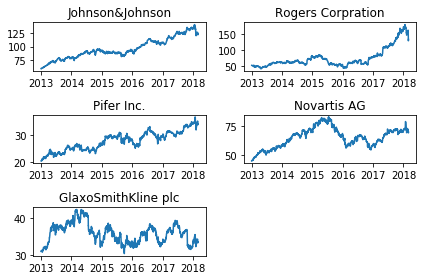

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax1.plot(multpl_stocks['Adj Close']['JNJ'])
ax1.set_title("Johnson&Johnson")
ax2.plot(multpl_stocks['Adj Close']['ROG'])
ax2.set_title("Rogers Corpration")
ax3.plot(multpl_stocks['Adj Close']['PFE'])
ax3.set_title("Pifer Inc.")
ax4.plot(multpl_stocks['Adj Close']['NVS'])
ax4.set_title("Novartis AG")
ax5.plot(multpl_stocks['Adj Close']['GSK'])
ax5.set_title("GlaxoSmithKline plc")
plt.tight_layout()
plt.show()

In [14]:
# creating connection towards the SQL alchemy
rds_connection_string = "postgres:2305nseW@localhost:5432/pharma_dataframe_db"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [15]:
engine.table_names()

['pharmatop5csv', 'wikitop_pharma_rev', 'wikitop_pharma_mar']

In [16]:
pd.read_sql_query('select * from pharmatop5csv', con=engine).head()

,ticker,stockprice2013,stockprice2014,stockprice2015,stockprice2016,stockprice2017,stockprice2018
0,ROG,52.353466,62.325675,65.237064,60.072579,112.871036,161.835238
1,NVS,53.170563,66.242726,75.343103,61.678335,67.030031,72.483122
2,PFE,23.262087,25.140816,28.927279,29.181433,31.460503,34.309155
3,GSK,36.101044,38.333451,34.694882,35.006807,35.698398,33.983060
4,JNJ,72.171061,87.265759,88.805282,104.100359,122.054810,131.327079
